In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<h2>Loading Images</h2>

In [3]:
image_gray = cv2.imread("/kaggle/input/images/image.jpg", cv2.IMREAD_GRAYSCALE)
image_gray

array([[176, 182, 184, ...,  59, 157, 178],
       [177, 180, 183, ...,  32, 124, 176],
       [179, 177, 180, ...,  28,  99, 181],
       ...,
       [113,  96,  94, ..., 117, 129, 135],
       [106,  92,  86, ..., 115, 123, 128],
       [ 94,  87,  79, ..., 114, 118, 122]], dtype=uint8)

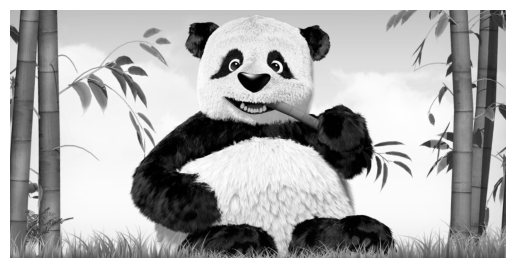

In [4]:
plt.imshow(image_gray, cmap="gray");
plt.axis("off")
plt.show()

In [5]:
type(image_gray)

numpy.ndarray

In [6]:
image_gray.shape

(510, 1020)

In [7]:
image = cv2.imread("/kaggle/input/images/image.jpg", cv2.IMREAD_COLOR)
image[0,0]

array([194, 182, 158], dtype=uint8)

In [8]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image[0,0]

array([158, 182, 194], dtype=uint8)

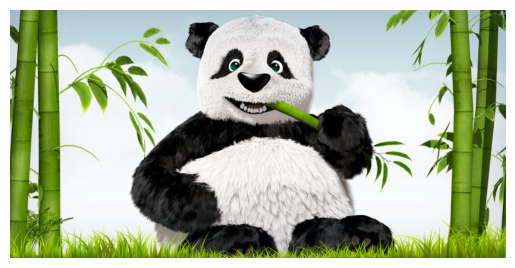

In [9]:
plt.imshow(image)
plt.axis("off");

<h2>Saving Images</h2>

In [10]:
cv2.imwrite("/kaggle/working/images/image_gray.jpg", image_gray)

False

<h2>Resizing The Image</h2>
<div style="font-size:18px;font-family:calibri">
    Resizing images is a common task in image preprocessing for two reasons. First, images come in all shapes and sizes, and to be usable as features, images must have the same dimensions. This standardization of image size does come with costssthowever; images are matrices of information and when we reduce the size of the image we are reducing the size of that matrix and the information it contains. <br><br> Second, machine learning can require thousands or hundreds of thousands of images. When those images are very large they can take up a lot of memory, and by resizing them we can dramatically reduce memory usage. Some common image sizes for machine learning are 32 × 32, 64 × 64, 96 × 96, and 256 × 256. In essence, the method we choose for image resizing will often be a tradeoff between the stastical performance of our model and computational cost to train it.

(-0.5, 509.5, 1019.5, -0.5)

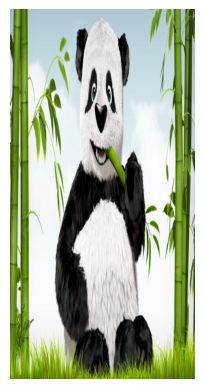

In [11]:
image_50 = cv2.resize(image, (510,1020))
plt.imshow(image_50)
plt.axis("off")

<h2>Cropping The Images</h2>

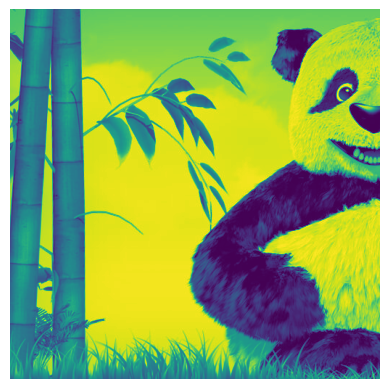

In [12]:
image_cropped = image_gray[:,:510]
plt.imshow(image_cropped)
plt.axis("off");

<h2>Blurring Images</h2>

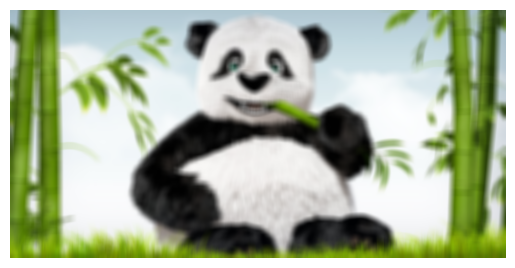

In [13]:
# As the size of the kernel increases the intensity of the blur also increases.
image_blurry = cv2.blur(image, (15, 15))
plt.imshow(image_blurry)
plt.axis("off");

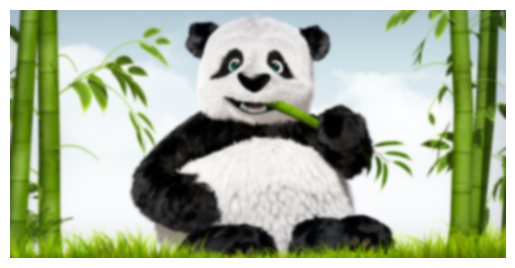

In [14]:
# Gaussian blur is the result of blurring an image by a Gaussian function. It is a widely 
# used effect in graphics software, typically to reduce image noise and reduce detail. 
img = cv2.GaussianBlur(image, (15, 15), 0)
plt.imshow(img)
plt.axis("off");

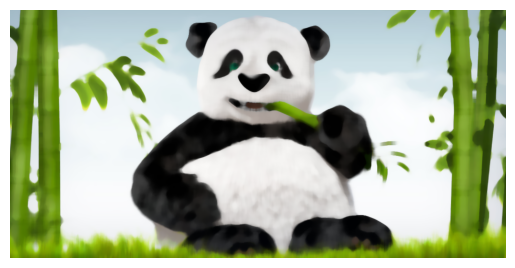

In [15]:
# The Median Filter is a non-linear digital filtering technique, often used to remove noise 
# from an image or signal.
img = cv2.medianBlur(image, 15)
plt.imshow(img)
plt.axis("off");

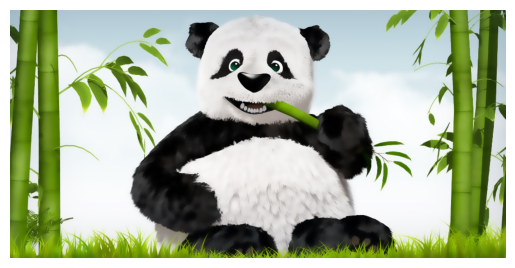

In [16]:
# A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter 
# for images. It replaces the intensity of each pixel with a weighted average of intensity 
# values from nearby pixels.
img = cv2.bilateralFilter(image, 15, 75, 75)
plt.imshow(img)
plt.axis("off");

In [17]:
# Manually creating and using the kernel in image blurring
kernel = np.ones((5,5))/25
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

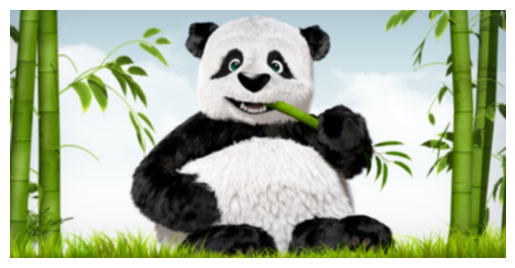

In [18]:
# We can manually apply kernel to an image using filter2D to produce a similar blurring effect.
img_kernel = cv2.filter2D(image, -1, kernel)
plt.imshow(img_kernel)
plt.axis("off");

<h2>Sharpening Images</h2>

(-0.5, 1019.5, 509.5, -0.5)

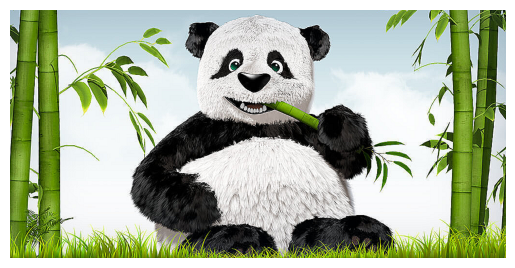

In [19]:
kernel = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])
image_sharp = cv2.filter2D(image, -1, kernel)
plt.imshow(image_sharp)
plt.axis("off")

<h2>Enhancing Contrast</h2>

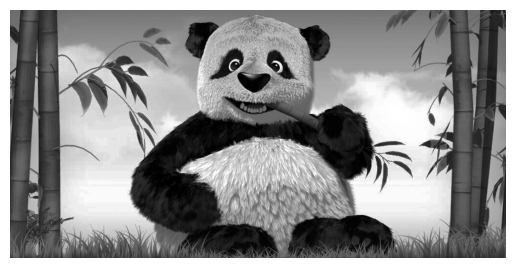

In [20]:
image_gray = cv2.imread("/kaggle/input/images/image.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.equalizeHist(image_gray)
plt.imshow(img, cmap="gray")
plt.axis("off");

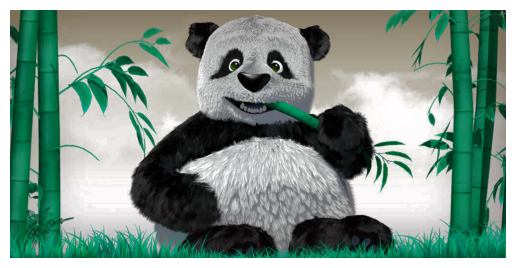

In [21]:
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
plt.imshow(image_rgb)
plt.axis("off");

<h2>Isolating Colors</h2>

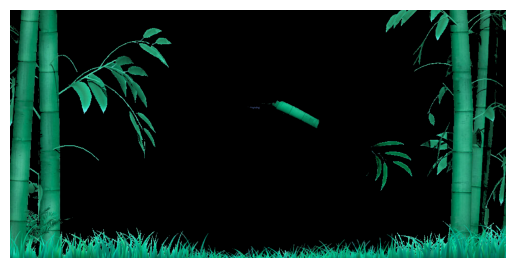

In [22]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_blue = np.array([50, 100, 70])
upper_blue = np.array([130, 255, 255])
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)
image_bgr_masked = cv2.bitwise_and(image, image, mask=mask)
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off");

<h2>Binarizing Images </h2>
<div style="font-size:18px;font-family:calibri">
Given an image, you want to output the simplified version.
    <br>
    Thresholding is the process of setting pixels with intensity greater than some value to be white and less than the value to be black.
</div>

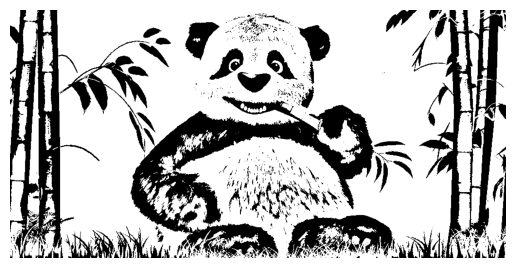

In [23]:
max_output_val = 255
neighborhood_size = 111
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_gray,
                                       max_output_val,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY,
                                       neighborhood_size,
                                       subtract_from_mean)
plt.imshow(image_binarized, cmap="gray")
plt.axis("off");

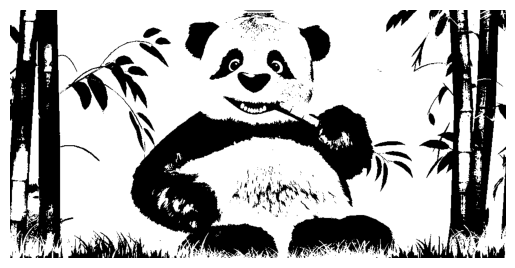

In [24]:
image_mean_threshold = cv2.adaptiveThreshold(image_gray,
                                       max_output_val,
                                       cv2.ADAPTIVE_THRESH_MEAN_C,
                                       cv2.THRESH_BINARY,
                                       neighborhood_size,
                                       subtract_from_mean)
plt.imshow(image_mean_threshold, cmap="gray")
plt.axis("off");

<h2>Removing Backgrounds</h2>
<div style="font-size:18px;font-family:calibri">
    Mark a rectangle around the desired foreground, then run the GrabCut algorithm.
</div>

(-0.5, 1019.5, 509.5, -0.5)

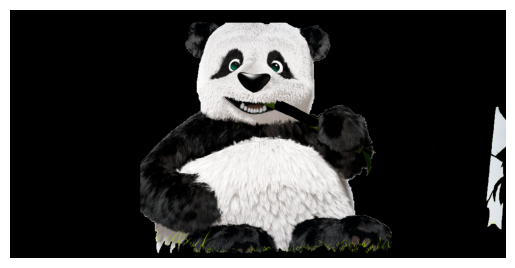

In [25]:
rect = (268,28,800,472)
mask = np.zeros(image.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv2.grabCut(
    image,
    mask,
    rect,
    bgdModel,
    fgdModel,
    5,
    cv2.GC_INIT_WITH_RECT
)

mask_2 = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")
image_rgb_nobg = image*mask_2[:, :, np.newaxis]
plt.imshow(image_rgb_nobg)
plt.axis("off")

(-0.5, 1019.5, 509.5, -0.5)

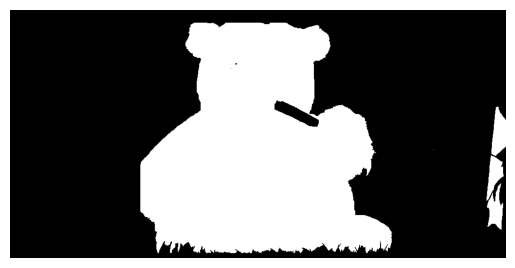

In [26]:
plt.imshow(mask_2, cmap = "gray")
plt.axis("off")

<h2>Detecting Edges</h2>
<div style="font-size:18px;font-family:calibri">
    Using the Canny Edge Detector
</div>

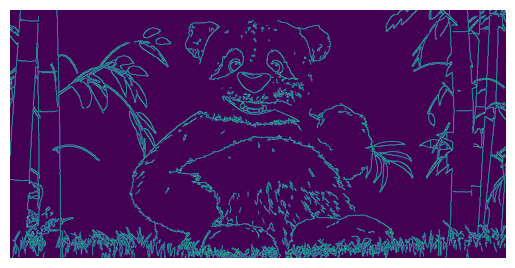

In [27]:
median_intensity = np.median(image_gray)

# Set the threshold to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1 + 0.33) * median_intensity))

img = cv2.Canny(image_gray, lower_threshold, upper_threshold)
plt.imshow(img)
plt.axis("off");

<h2>Detecting Corners</h2>
<div style="font-size:18px;font-family:calibri">
    Using Harris Corner Detectors: cornerHarris
</div>

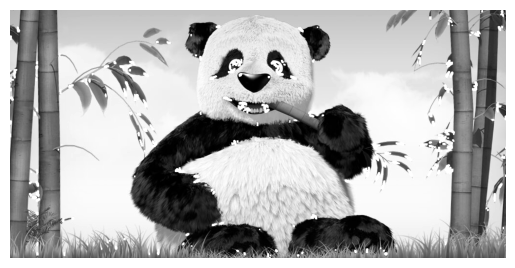

In [28]:
img = cv2.imread("/kaggle/input/images/image.jpg")
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = np.float32(img2)

block_size = 2
aperture = 29
free_parameter = 0.01

detector_responses = cv2.cornerHarris(img2, block_size, aperture, free_parameter)
detector_responses = cv2.dilate(detector_responses, None)
threshold = 0.02

img[detector_responses > threshold * detector_responses.max()] = [255, 255, 255]
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap="gray")
plt.axis("off");

(-0.5, 1019.5, 509.5, -0.5)

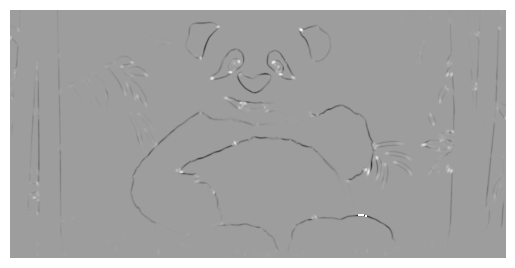

In [29]:
plt.imshow(detector_responses, cmap="gray")
plt.axis("off")

(-0.5, 1019.5, 509.5, -0.5)

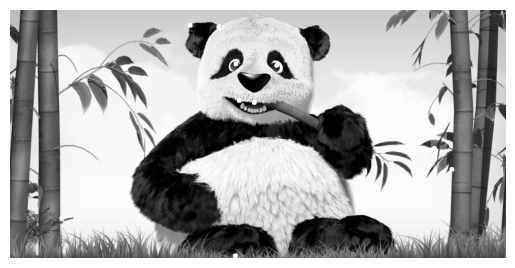

In [30]:
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

corners = cv2.goodFeaturesToTrack(image_gray,
                       corners_to_detect,
                       minimum_quality_score,
                       minimum_distance)
corners = np.int16(corners)

for corner in corners:
    x, y = corner[0]
    cv2.circle(image, (x,y), 5, (255, 255, 255), -1)

img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")
plt.axis("off")

<h2>Creating Features for Machine Learning</h2>

In [35]:
image_10x = cv2.resize(image_gray, (30, 30))
image_10x.flatten()

array([184, 120, 104, 194, 194, 195, 195, 195, 195, 195, 195, 195, 195,
       195, 195, 194, 195, 195, 195, 195, 195, 195, 195, 157, 195, 139,
       192, 118, 149,  38, 185,  61, 108, 199, 200, 200, 200, 200, 200,
       200, 202, 203, 200, 225, 207, 222, 201, 200, 200, 200, 200, 200,
       200, 120, 200, 200, 136, 122,  79,  49, 192, 101, 111, 206, 204,
       204, 204, 204, 132, 206, 208,   1, 221, 228, 216, 234, 221, 174,
         6, 204, 204, 204, 204, 204, 204, 197, 202, 118,  42,  54,  53,
       103, 120, 207, 208, 208, 209, 208, 210, 220, 211,  65, 234, 220,
       228, 236, 236, 231,   5, 206, 208, 208, 208, 208, 208, 208, 206,
       129,  72,  99,  61, 103, 144, 231, 236, 214, 215, 213, 213, 223,
       213,   6, 229, 222, 234, 231, 219, 222,   4, 213, 213, 213, 213,
       213, 214, 213, 211, 133,  79, 131,  60, 105, 154, 244, 243, 239,
       217, 217, 219, 232, 220,  36, 241,  23, 243, 237, 237, 220,  38,
       217, 217, 217, 217, 217, 214, 217, 213, 135,  93, 178,  5

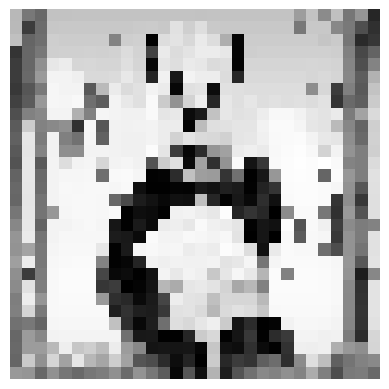

In [36]:
plt.imshow(image_10x, cmap="gray")
plt.axis("off");

In [39]:
image_10x.flatten().shape

(900,)

In [41]:
image_10x = cv2.resize(image, (10, 10))
image_10x.flatten().shape

(300,)

In [47]:
print(f"Total Pixel Values in Black-White Image is: {image_gray.flatten().shape}")
# Number of feature only intensifies when the Color image is used.
print(f"Total Pixel Values in Color Image is: {image.flatten().shape}")

Total Pixel Values in Black-White Image is: (520200,)
Total Pixel Values in Color Image is: (1560600,)


<h2>Encoding Color Histograms as Features</h2>

In [53]:
features = list()
colors = ("r", "g", "b")

for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    # print(histogram)
    features.extend(histogram)

In [54]:
observation = np.array(features).flatten()
observation[:5]

array([6978., 5359., 3565., 2874., 2266.], dtype=float32)

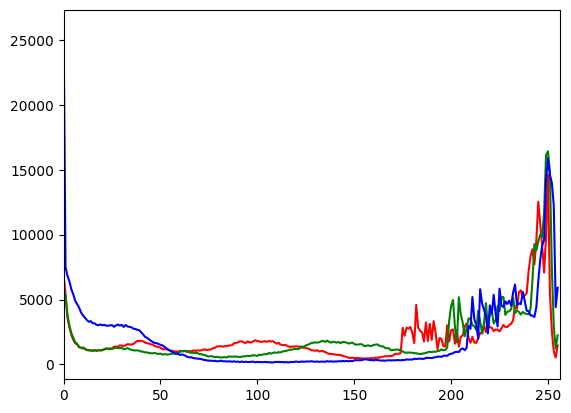

In [57]:
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = channel)
    plt.xlim([0, 256])

<h2> Using Pretrained Embeddings as a Feature </h2>

In [68]:
import tensorflow as tf
import tensorflow_hub as hub

In [72]:
tf_image = tf.image.convert_image_dtype([image], tf.float32)
embedding_model = hub.KerasLayer("https://www.kaggle.com/models/google/inception-v1/TensorFlow2/feature-vector/2",
               trainable=True, arguments=dict(batch_norm_momentum=0.997))
embeddings = embedding_model(tf_image)

In [73]:
print(embeddings)

tf.Tensor([[0.20286909 0.00695087 0.00065814 ... 0.         0.         0.00280765]], shape=(1, 1024), dtype=float32)


In [74]:
embeddings.shape

TensorShape([1, 1024])

<h2>End of Day 6:)</h2>